# 红酒数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn import tree
from sklearn.datasets import load_wine
wine = load_wine() #加载数据集

In [3]:
data = wine.data
pd.DataFrame(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [4]:
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1) #用表格展示

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
wine.feature_names #各个特征的名称

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
X = wine.data
y = wine.target

In [7]:
X[y==0,0]

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 14.06, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39,
       13.3 , 13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48,
       13.28, 13.05, 13.07, 14.22, 13.56, 13.41, 13.88, 13.24, 13.05,
       14.21, 14.38, 13.9 , 14.1 , 13.94, 13.05, 13.83, 13.82, 13.77,
       13.74, 13.56, 14.22, 13.29, 13.72])

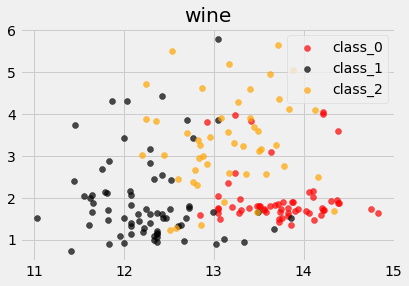

In [8]:
colors = ['red', 'black', 'orange']

plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X[y == i, 0]
                ,X[y == i, 1]
                ,alpha=.7
                ,c=colors[i]
                ,label=wine.target_names[i]
               )
plt.legend()
plt.title('wine')
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier                      #knn算法
from sklearn.tree import DecisionTreeClassifier                         #决策树
from sklearn.naive_bayes import GaussianNB                              #高斯贝叶斯
from sklearn.linear_model import LogisticRegression                     #逻辑回归
from sklearn.ensemble import RandomForestClassifier                     #随机森林
from sklearn.svm import SVC                                             #支持向量机

In [10]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
print(Xtrain.shape)
print(Ytrain.shape)

(124, 13)
(124,)


## 决策树

In [96]:
#网格搜索
from sklearn.model_selection import GridSearchCV

# 设置可选参数
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10)}
# 设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR.fit(Xtrain,Ytrain)

# 输出接口  最优的取值
print(GR.best_params_)
print(GR.best_score_)   #网格搜索后的模型的评判标准

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.9756666666666666


In [11]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=6,
                            min_samples_leaf=1,min_samples_split=6).fit(Xtrain,Ytrain)
decision_tree.fit(Xtrain, Ytrain)
Y_pred = decision_tree.predict(Xtest)
acc_decision_tree = round(decision_tree.score(Xtest, Ytest) * 100, 2)
cross_decision_tree = cross_val_score(decision_tree,X,y,cv=10).mean()
print(acc_decision_tree)
print(cross_decision_tree)

94.44
0.9153594771241831


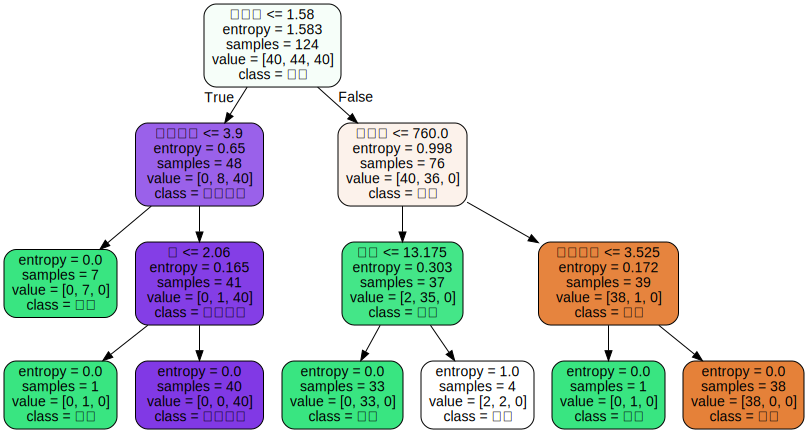

In [12]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']     

import graphviz #可视化组件，需自己安装，配置环境变量等
dot_data = tree.export_graphviz(decision_tree
                                ,feature_names = feature_name
                                ,class_names = ["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [ ]:
with open("tree.dot", 'w',encoding='utf-8') as f:
    f = tree.export_graphviz(decision_tree
                                ,feature_names = feature_name
                                ,class_names = ["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                 ,out_file=f
                                )

In [19]:
decision_tree.feature_importances_ #查看各个属性的重要程度

array([0.18133049, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.46931189, 0.        , 0.        , 0.34935762,
       0.        , 0.        , 0.        ])

In [22]:
[*zip(feature_name,decision_tree.feature_importances_)]  #连成元组

[('酒精', 0.1813304896912299),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.4693118892528786),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.34935762105589163),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.0)]

## 随机森林

0.9833333333333332 191


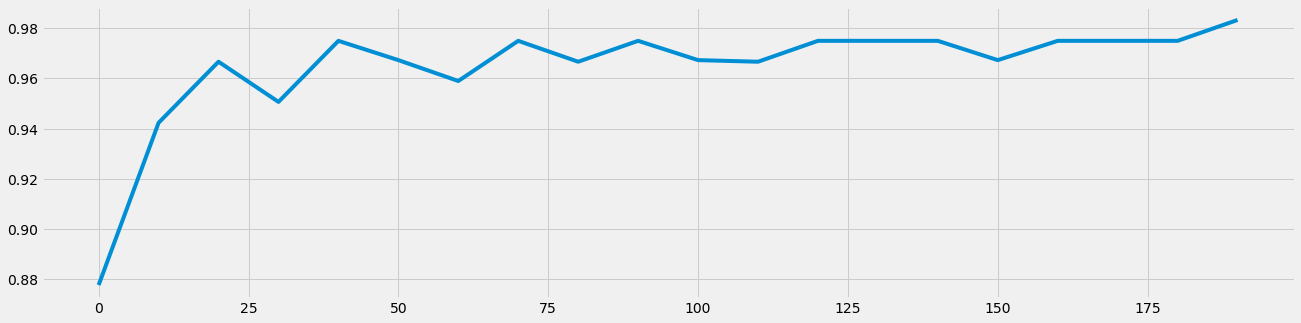

In [24]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1)
    score = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(0,200,10),scorel)
plt.show()

In [13]:
random_forest = RandomForestClassifier(n_estimators=13
                                       ,random_state=10)
random_forest.fit(Xtrain, Ytrain)
Y_pred = random_forest.predict(Xtest)
print(random_forest.score(Xtrain, Ytrain))
print(random_forest.score(Xtest, Ytest))
acc_random_forest = round(random_forest.score(Xtest, Ytest) * 100, 2)
cross_random_forest = cross_val_score(random_forest,X,y,cv=10).mean()
print(acc_random_forest)
print(cross_random_forest)

1.0
0.9629629629629629
96.3
0.9663398692810456


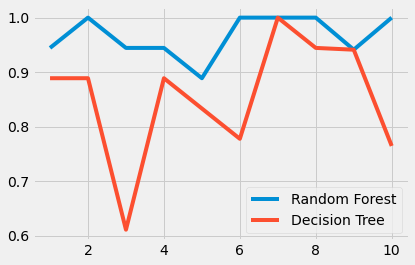

In [102]:
rfc = RandomForestClassifier(n_estimators=13,random_state=10)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier(random_state=10)
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "Random Forest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

## KNN

In [21]:
from sklearn.preprocessing import MinMaxScaler
#实现归一化
scaler = MinMaxScaler()                             #实例化
scaler = scaler.fit(wine.data)                           #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(wine.data)                     #通过接口导出结果
result

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

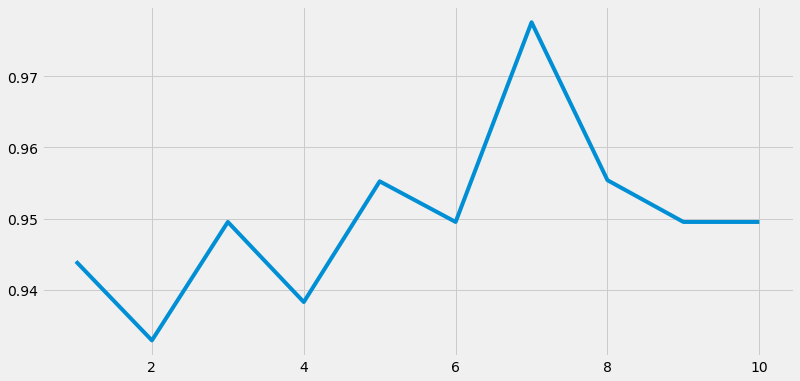

In [104]:
score=[]

for i in list(range(1,11)):
    KNN = KNeighborsClassifier(n_neighbors=i)
    CVS = cross_val_score(KNN,result,wine.target,cv=5)   #交叉验证
    score.append(CVS.mean())
    
plt.plot([*range(1,11)],score)  # *range 激活成列表
fig = plt.gcf()
fig.set_size_inches(12,6)

In [22]:
Xtrain2,Xtest2,Ytrain2,Ytest2 = train_test_split(result,wine.target,test_size=0.3)
print(Xtrain2.shape)
print(Ytrain2.shape)

(124, 13)
(124,)


In [16]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(Xtrain2, Ytrain2)
Y_pred = knn.predict(Xtest2)
acc_knn = round(knn.score(Xtest2, Ytest2) * 100, 2)
cross_knn = cross_val_score(knn,result,y,cv=10).mean()
print(acc_knn)
print(cross_knn)

98.15
0.9663398692810456


## 朴素贝叶斯

In [17]:
gaussian = GaussianNB()
gaussian.fit(Xtrain, Ytrain)
Y_pred = gaussian.predict(Xtest)
print(gaussian.score(Xtrain, Ytrain))
print(gaussian.score(Xtest, Ytest))
acc_gaussian = round(gaussian.score(Xtest, Ytest) * 100, 2)
cross_gaussian = cross_val_score(gaussian,X,y,cv=10).mean()
print(acc_gaussian)
print(cross_gaussian)

0.9919354838709677
0.9814814814814815
98.15
0.9777777777777779


## 逻辑回归

In [18]:
logreg = LogisticRegression(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
logreg.fit(Xtrain, Ytrain)
Y_pred = logreg.predict(Xtest)
print(logreg.score(Xtrain, Ytrain))
print(logreg.score(Xtest, Ytest))
acc_log = round(logreg.score(Xtest, Ytest) * 100, 2)
cross_log = cross_val_score(logreg,X,y,cv=10).mean()
print(acc_log)
print(cross_log)           

0.967741935483871
0.9629629629629629
96.3
0.9555555555555555


## SVM

In [109]:
from time import time #随时监控我们的模型的运行时间
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ,decision_function_shape='ovr'
             ,C=0.8
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest) #获取模型的预测结果
    score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
    print(score)
#     recall = recall_score(Ytest, result)
#     auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
#     print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

0.9259259259259259
00:00:010998
0.9259259259259259
00:00:034907
0.42592592592592593
00:00:038926
0.3888888888888889
00:00:039926


In [19]:
clf = SVC(kernel = "poly"
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ,decision_function_shape='ovr'
             ,C=0.8
             ).fit(Xtrain, Ytrain)
score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
acc_svm = round(score * 100, 2)
cross_svm = cross_val_score(clf,X,y,cv=10).mean()
print(acc_svm)
print(cross_svm)

98.15
0.9666666666666668


In [20]:
models = pd.DataFrame({
    'Model': [ 'KNN','Logistic Regression','GaussianNB',
              'Random Forest','Decision Tree','SVM'],
    'Score': [acc_knn,acc_log,acc_gaussian,
              acc_random_forest,acc_decision_tree,acc_svm]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,98.15
2,GaussianNB,98.15
5,SVM,98.15
1,Logistic Regression,96.30
3,Random Forest,96.30
4,Decision Tree,94.44
